# HyperParameter Tunning

classification dataset will be - https://www.kaggle.com/datasets/kukuroo3/body-performance-data?select=bodyPerformance.csv

regression dataset will be - https://www.kaggle.com/datasets/wkirgsn/electric-motor-temperature/data?select=measures_v2.csv

In [1]:
# import dataset
import kagglehub
import numpy as np
from  matplotlib import  pyplot as plt


# Download latest version
path_electric = kagglehub.dataset_download("wkirgsn/electric-motor-temperature", path="measures_v2.csv")
path_body = kagglehub.dataset_download("kukuroo3/body-performance-data", path="bodyPerformance.csv")

In [2]:
import pandas as pd

dataset_body = pd.read_csv(path_body)
dataset_electric = pd.read_csv(path_electric)

## Preprocessing
 ### Cleaning
 - apply label encoding for "gender", "class" in Body Performance Dataset 
  - in Electric Motor Dataset there is nothing to do.  

In [3]:
dataset_body.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [4]:
dataset_electric.head()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101,17
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417,17
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615,17
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303,17
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197,17


In [3]:
# applying label encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

list_of_columns = ["gender", "class"]
for column_name in list_of_columns:
    dataset_body[column_name] = le.fit_transform(dataset_body[column_name])

- Splitting the dataset

In [4]:
from sklearn.model_selection import train_test_split

# split body dataset
columns_body = dataset_body.drop("class", axis=1).to_numpy()
target_body = dataset_body["class"].to_numpy()
x_body_train , x_body_test, y_body_train, y_body_test = train_test_split(columns_body, target_body, test_size=0.3, random_state=11)

# split electric motor dataset
columns_electric =  dataset_electric.drop("pm", axis=1).to_numpy()
target_electric = dataset_electric["pm"].to_numpy()
x_electric_train, x_electric_test, y_electric_train, y_electric_test = train_test_split(columns_electric, target_electric, test_size=0.3, random_state=11)

- Create a line plot with the number of neighbors of KNN on the X-axis and the accuracy of the model on the Y-axis on the classification data set.

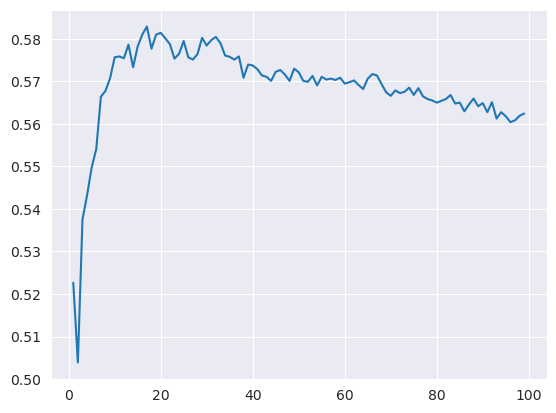

In [7]:
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.metrics import  accuracy_score
from  matplotlib import  pyplot as plt
from sklearn.model_selection import GridSearchCV

tuning_parameters = {
    "n_neighbors": range(1, 100)
}
grid_search =  GridSearchCV(KNeighborsClassifier(), tuning_parameters, scoring="accuracy", n_jobs=-1)
grid_search.fit(x_body_train, y_body_train)
results =  pd.DataFrame(grid_search.cv_results_)

fig, ax = plt.subplots()
ax.plot(results["param_n_neighbors"], results["mean_test_score"])
plt.show()

So as we could observe peak accuracy is reached near *n_neighbors* = 18 And then it gradually decreases.

- Create a line plot with the number of neighbors of KNN (Regression version) on the X-axis and the MSE of the model on the Y-axis on the regression data set.

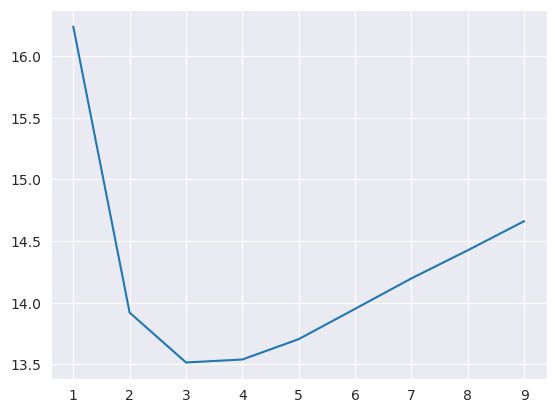

In [8]:
from sklearn.neighbors import  KNeighborsRegressor
from sklearn.metrics import  mean_squared_error
from  matplotlib import  pyplot as plt
from sklearn.model_selection import GridSearchCV

tuning_parameters = {
    "n_neighbors": range(1, 10)
}

grid_search = GridSearchCV(KNeighborsRegressor(), tuning_parameters, scoring="neg_mean_squared_error", n_jobs=-1)
grid_search.fit(x_electric_train, y_electric_train)
results = pd.DataFrame(grid_search.cv_results_)

fig, ax = plt.subplots()
ax.plot(results["param_n_neighbors"], abs(results["mean_test_score"]))
plt.show()

This thing is horrible. Initially I implemented it using a simple for loop that took so much time I managed to rethink my life decisions. Then I re-implemented it with GridSearch and even though it take 2 min just for *n_neighbors*=1..10. Therefore, for this homework I will assume that this is the whole graph. We could observe that the smallest MSE is 13.5 at *n_neighbors*=3. That will mean that the optimal *n_neighbors* is 3.

- Create a heatmap using the TreeDecissionClassifier using the max_depth as X-axis and max_features as Y-axis and the color of the map should depend on the accuracy of the model on the classification data set for the criterion = gini


<Axes: title={'center': 'Decision Tree Classifier (criterion=gini) Accuracy'}, xlabel='param_max_depth', ylabel='param_max_features'>

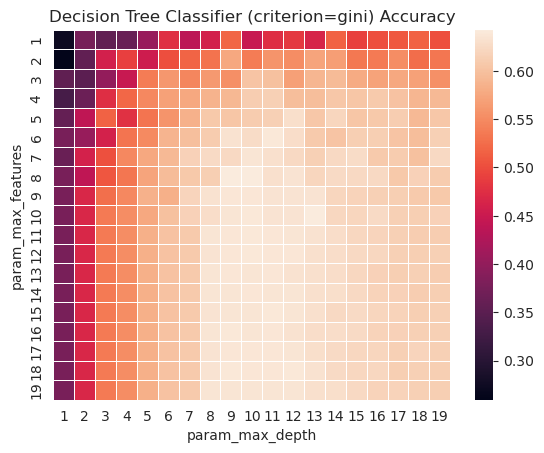

In [18]:
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

tuning_parameters = {
    "max_depth": range(1, 20),
    "max_features": range(1, 20),
    "criterion": ["gini"],
}

grid_search = GridSearchCV(DecisionTreeClassifier(), tuning_parameters, scoring="accuracy", n_jobs=-1, cv=2)
grid_search.fit(x_body_train, y_body_train)
results = pd.DataFrame(grid_search.cv_results_)

hyperparameter_tuning = (
    results
    .pivot(index="param_max_features", columns="param_max_depth", values="mean_test_score")
)

f, ax = plt.subplots()
plt.title('Decision Tree Classifier (criterion=gini) Accuracy')
sns.heatmap(hyperparameter_tuning, linewidths=0.5, ax=ax)

Judging by the heatmap the optimal *max_depth*=9..12 and *max_features*=5..11.

- Create a heatmap using the TreeDecissionClassifier using the max_depth as X-axis and max_features as Y-axis and the color of the map should depend on the accuracy of the model on the classification data set for the criterion = entropy.

<Axes: title={'center': 'Decision Tree Classifier (criterion=entropy) Accuracy'}, xlabel='param_max_depth', ylabel='param_max_features'>

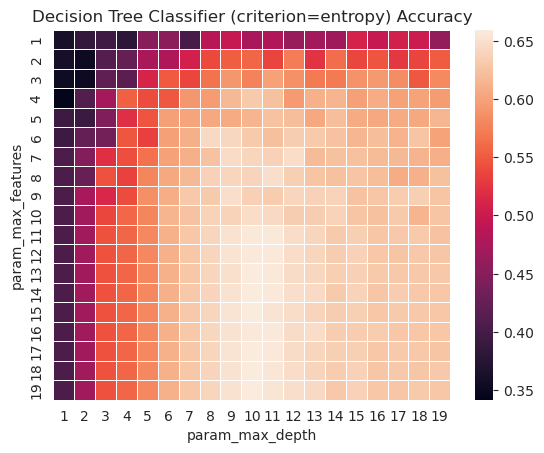

In [17]:
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

tuning_parameters = {
    "max_depth": range(1, 20),
    "max_features": range(1, 20),
    "criterion": ["entropy"],
}

grid_search = GridSearchCV(DecisionTreeClassifier(), tuning_parameters, scoring="accuracy", n_jobs=-1, cv=2)
grid_search.fit(x_body_train, y_body_train)
results = pd.DataFrame(grid_search.cv_results_)

hyperparameter_tuning = (
    results
    .pivot(index="param_max_features", columns="param_max_depth", values="mean_test_score")
)

f, ax = plt.subplots()
plt.title('Decision Tree Classifier (criterion=entropy) Accuracy')
sns.heatmap(hyperparameter_tuning, linewidths=0.5, ax=ax)

Referencing to the previous heatmap we could say that *criterion*= entropy gives as a better accuracy in addition to values for *max_depth* and *max_features* didn't change a lot I would even assume that they shrieked to a narrow range now the highest accuracy is given by *max_depth*=10 and *max_features*=10..18.   

- Create a heatmap using the TreeDecissionRegression using the max_depth as X-axis and max_features as Y-axis and the color of the map should depend on the MSE of the model on the regression data set for the criterion = friedman_mse.

<Axes: title={'center': 'Decision Tree Regressor (criterion=friedman_mse) '}, xlabel='param_max_depth', ylabel='param_max_features'>

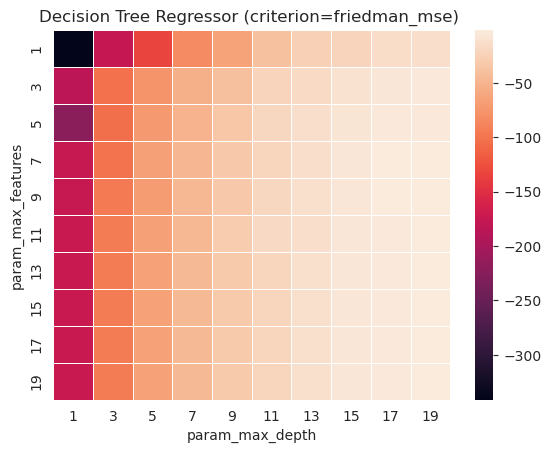

In [25]:
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor

tuning_parameters = {
    "max_depth": range(1, 20, 2),
    "max_features": range(1, 20, 2),
    "criterion": ["friedman_mse"],
}

grid_search = GridSearchCV(DecisionTreeRegressor(), tuning_parameters, scoring="neg_mean_squared_error", n_jobs=-1, cv=2)
grid_search.fit(x_electric_train, y_electric_train)
results = pd.DataFrame(grid_search.cv_results_)

hyperparameter_tuning = (
    results
    .pivot(index="param_max_features", columns="param_max_depth", values="mean_test_score")
)

f, ax = plt.subplots()
plt.title('Decision Tree Regressor (criterion=friedman_mse) ')
sns.heatmap(hyperparameter_tuning,  linewidths=.5, ax=ax)

We could observe that the greater *max_depth* is the smaller error is. But most probably after 15 we are talking about overfitting. 

- Create a heatmap using the TreeDecissionRegression using the max_depth as X-axis and max_features as Y-axis and the color of the map should depend on the MSE of the model on the regression data set for the criterion = poisson.

<Axes: title={'center': 'Decision Tree Regressor (criterion=poisson) '}, xlabel='param_max_depth', ylabel='param_max_features'>

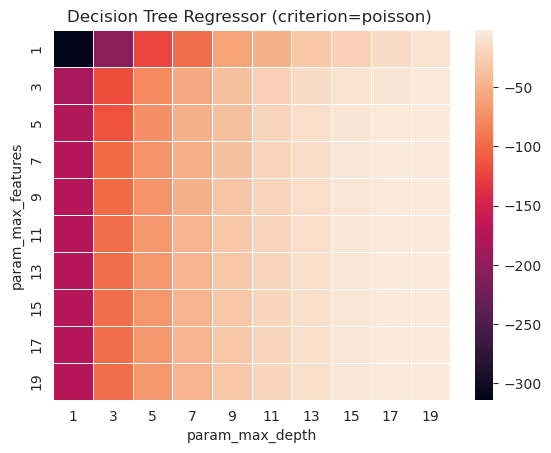

In [26]:
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor

tuning_parameters = {
    "max_depth": range(1, 20, 2),
    "max_features": range(1, 20, 2),
    "criterion": ["poisson"],
}

grid_search = GridSearchCV(DecisionTreeRegressor(), tuning_parameters, scoring="neg_mean_squared_error", n_jobs=-1, cv=2)
grid_search.fit(x_electric_train, y_electric_train)
results = pd.DataFrame(grid_search.cv_results_)

hyperparameter_tuning = (
    results
    .pivot(index="param_max_features", columns="param_max_depth", values="mean_test_score")
)

f, ax = plt.subplots()
plt.title('Decision Tree Regressor (criterion=poisson) ')
sns.heatmap(hyperparameter_tuning,  linewidths=.5, ax=ax)

Again if we refer to previous heatmap the greater the max_depth the smaller is the error. But again after *max_depth*=15 we are talking about overfiting as decision tree is inclined to this type of behavior.

___
- Create a line plot using the RandomForestClassifier containing 2 lines for criterion = gini and one for criterion = entropy on X-axis should be the n_estimators and one Y-axis the accuracy of the model on the classification data set

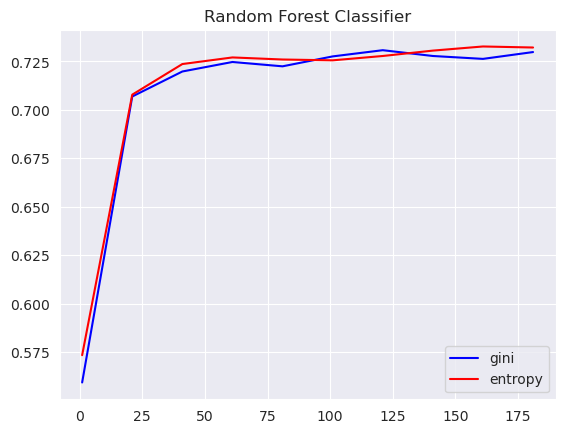

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

tuning_parameters = {
    "criterion": ["gini", "entropy"],
    "n_estimators": range(1,200,20)
}

grid_search = GridSearchCV(RandomForestClassifier(), tuning_parameters, scoring="accuracy", n_jobs=-1)
grid_search.fit(x_body_train, y_body_train)
results = pd.DataFrame(grid_search.cv_results_)

# getting gini and entropy separated
gini = results[results["param_criterion"] == "gini"]
entropy = results[results["param_criterion"] == "entropy"]

f, ax = plt.subplots()
plt.title('Random Forest Classifier')
ax.plot(gini["param_n_estimators"], gini["mean_test_score"], "b", label="gini")
ax.plot(entropy["param_n_estimators"], entropy["mean_test_score"], "r", label="entropy")
plt.legend(loc="lower right")
plt.show()

Both *gini* and *entropy* have similar results almost identical. And by judging by graph the optimal *n_estimators* is around 25 after this number we get into the overfiting zone. 

___
- Create a line plot using the RandomForestRegressor containing 3 lines for criterion =  “squared_error”, criterion =  “absolute_error” and one for criterion = “poisson”, on X-axis should be the n_estimators and one Y-axis the MSE of the model on the regression data set.

!!! Taking in consideration that the original dataset the training time and the memory usage will be too huge. I already wasted 3h because of long computational time and crashes because of full RAM. Therefor I will take 5% of the initial dataset.

In [6]:
# split electric dataset into 
columns_electric = dataset_electric.drop("pm", axis=1).to_numpy()
target_electric = dataset_electric["pm"].to_numpy()

x_electric_5_train, x_electric_25_test, y_electric_5_train, y_electric_5_test = train_test_split(columns_electric, target_electric, test_size=0.2, train_size=0.05, random_state=11)

[CV 2/2] END criterion=squared_error, n_estimators=13;, score=-5.432 total time=   6.2s
[CV 2/2] END criterion=absolute_error, n_estimators=17;, score=-6.441 total time= 7.8min
[CV 1/2] END criterion=squared_error, n_estimators=13;, score=-5.206 total time=   5.8s
[CV 1/2] END criterion=absolute_error, n_estimators=17;, score=-5.788 total time= 7.9min


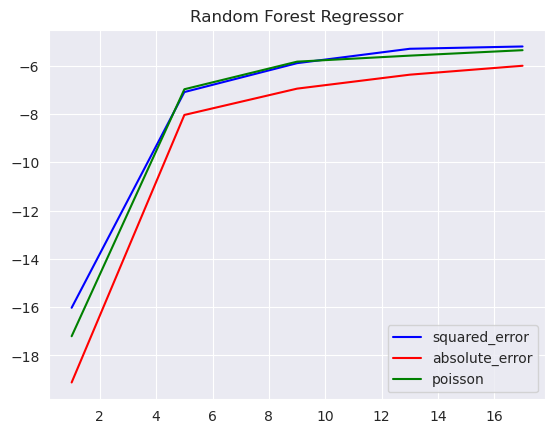

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

tuning_parameters = {
    "criterion": ["squared_error", "absolute_error", "poisson"],
    "n_estimators": range(1,20,4)
}

grid_search = GridSearchCV(RandomForestRegressor(), tuning_parameters, scoring="neg_mean_squared_error", n_jobs=-1, cv=2)
grid_search.fit(x_electric_5_train, y_electric_5_train)
results = pd.DataFrame(grid_search.cv_results_)

# getting gini and entropy separated
squared_error = results[results["param_criterion"] == "squared_error"]
absolute_error = results[results["param_criterion"] == "absolute_error"]
poisson = results[results["param_criterion"] == "poisson"]

f, ax = plt.subplots()
plt.title('Random Forest Regressor')
ax.plot(squared_error["param_n_estimators"], squared_error["mean_test_score"], "b", label="squared_error")
ax.plot(absolute_error["param_n_estimators"], absolute_error["mean_test_score"], "r", label="absolute_error")
ax.plot(poisson["param_n_estimators"], poisson["mean_test_score"], "g", label="poisson")
plt.legend(loc="lower right")
plt.show()

As shown the smallest error and in the same time the least probably to be in overfiting is around *n_estimators*= 8. All 3 *criterion* perform almost the same.

___
- Create a line plot using the SVC model containing 3 lines for kernel= {‘poly’, ‘rbf’, ‘sigmoid’} on X-axis should be the C and one Y-axis the accuracy of the model on the classification data set.

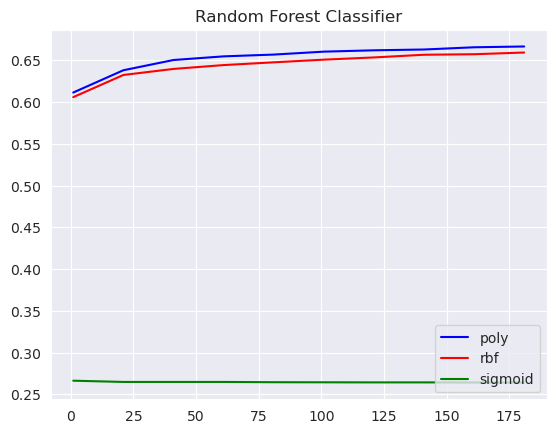

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

tuning_parameters = {
    "kernel": ["poly", "rbf", "sigmoid"],
    "C": range(1,200,20)
}

grid_search = GridSearchCV(SVC(), tuning_parameters, scoring="accuracy", n_jobs=-1)
grid_search.fit(x_body_train, y_body_train)
results = pd.DataFrame(grid_search.cv_results_)

# getting gini and entropy separated
poly = results[results["param_kernel"] == "poly"]
rbf = results[results["param_kernel"] == "rbf"]
sigmoid = results[results["param_kernel"] == "sigmoid"]

f, ax = plt.subplots()
plt.title('Support Vector Machine Classifier')
ax.plot(poly["param_C"], poly["mean_test_score"], "b", label="poly")
ax.plot(rbf["param_C"], rbf["mean_test_score"], "r", label="rbf")
ax.plot(sigmoid["param_C"], sigmoid["mean_test_score"], "g", label="sigmoid")
plt.legend(loc="lower right")
plt.show()

Again as in previous homework SVC performed bad with *kernel*=**sigmoid**. But nevertheless for **rbf** and **poly** the accuracy is almost identical. We could see that a great accuracy is obtained around *C*=**50**.

___
- Create a line plot using the SVR model containing 3 lines for kernel= {‘poly’, ‘rbf’, ‘sigmoid’} on X-axis should be the C and one Y-axis the MSE of the model on the regression data set.

Again for this task I will use only 1% of total 300MB of dataset

In [15]:
# split electric dataset into 
columns_electric = dataset_electric.drop("pm", axis=1).to_numpy()
target_electric = dataset_electric["pm"].to_numpy()

x_electric_1_train, x_electric_1_test, y_electric_1_train, y_electric_1_test = train_test_split(columns_electric, target_electric, test_size=0.02, train_size=0.01, random_state=11)

Fitting 2 folds for each of 30 candidates, totalling 60 fits


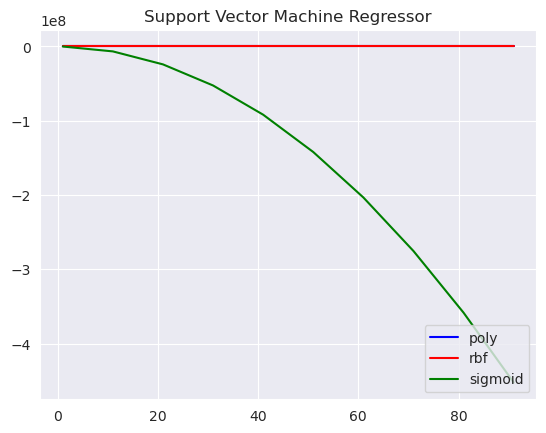

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

tuning_parameters = {
    "kernel": ["poly", "rbf", "sigmoid"],
    "C": range(1,100,10)
}

grid_search = GridSearchCV(SVR(), tuning_parameters, scoring="neg_mean_squared_error", n_jobs=-1, cv=2, verbose=3)
grid_search.fit(x_electric_1_train, y_electric_1_train)
results = pd.DataFrame(grid_search.cv_results_)

# getting gini and entropy separated
poly = results[results["param_kernel"] == "poly"]
rbf = results[results["param_kernel"] == "rbf"]
sigmoid = results[results["param_kernel"] == "sigmoid"]

f, ax = plt.subplots()
plt.title('Support Vector Machine Regressor')
ax.plot(poly["param_C"], poly["mean_test_score"], "b", label="poly")
ax.plot(rbf["param_C"], rbf["mean_test_score"], "r", label="rbf")
ax.plot(sigmoid["param_C"], sigmoid["mean_test_score"], "g", label="sigmoid")
plt.legend(loc="lower right")
plt.show()

The first thing that could be observed is that **rbf** kernel gives a zero error independently of the *C* value. **Sigmoid** kernel increases the error as the *C* increases. About the **poly** couldn't be told much it's error is at the order of ~190 which is very high, I could assume that this is determined by the small size of dataset I used for training.   